<a href="https://colab.research.google.com/github/VenuGopal1899/Deep-Learning-Projects/blob/main/Third.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from keras.datasets import reuters
import numpy as np

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

Use the below code snippet to decode the review in train_data


In [35]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


Vectorize the input tensor data

In [36]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Vectorize the labels to One-Hot-Encoding using built-in-way in keras/ by hard coding

In [37]:
"""
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
"""

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [38]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history_object = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history = history_object.history

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 3.0431 - accuracy: 0.4236 - val_loss: 1.6845 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4854 - accuracy: 0.6947 - val_loss: 1.2918 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0744 - accuracy: 0.7753 - val_loss: 1.1271 - val_accuracy: 0.7710
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8405 - accuracy: 0.8327 - val_loss: 1.0303 - val_accuracy: 0.7950
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6809 - accuracy: 0.8608 - val_loss: 0.9678 - val_accuracy: 0.8120
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5479 - accuracy: 0.8867 - val_loss: 0.9363 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4425 - accuracy: 0.9105 - val_loss: 0.9366 - val_accuracy: 0.8040
Epoch 8/20
16

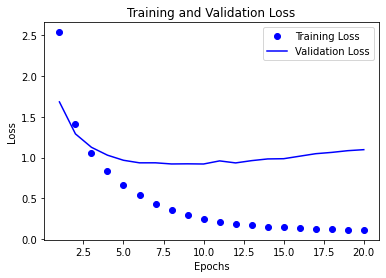

In [39]:
import matplotlib.pyplot as plt

loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

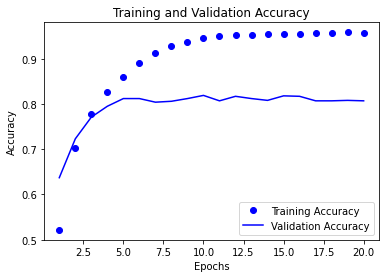

In [40]:
import matplotlib.pyplot as plt

acc = history['accuracy']
val_acc = history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [41]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

results = model2.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/10
16/16 [==============================] - 1s 56ms/step - loss: 3.1679 - accuracy: 0.3874 - val_loss: 1.7670 - val_accuracy: 0.5650
Epoch 2/10
16/16 [==============================] - 1s 45ms/step - loss: 1.5775 - accuracy: 0.6237 - val_loss: 1.3335 - val_accuracy: 0.7000
Epoch 3/10
16/16 [==============================] - 1s 46ms/step - loss: 1.1066 - accuracy: 0.7466 - val_loss: 1.1493 - val_accuracy: 0.7320
Epoch 4/10
16/16 [==============================] - 1s 47ms/step - loss: 0.8802 - accuracy: 0.8020 - val_loss: 1.0730 - val_accuracy: 0.7540
Epoch 5/10
16/16 [==============================] - 1s 46ms/step - loss: 0.6575 - accuracy: 0.8536 - val_loss: 0.9770 - val_accuracy: 0.7890
Epoch 6/10
16/16 [==============================] - 1s 46ms/step - loss: 0.5347 - accuracy: 0.8836 - val_loss: 0.9477 - val_accuracy: 0.7900
Epoch 7/10
16/16 [==============================] - 1s 47ms/step - loss: 0.4150 - accuracy: 0.9125 - val_loss: 0.9949 - val_accuracy: 0.7790
Epoch 8/10
16

Since, last layer in our model is using softmax, activation function, we can generate predictions on new data, using predict method. It generates probability distribution over all 46 topics.

In [42]:
predictions = model.predict(x_test)

print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.99999994
3


Earlier, we used categorical labels list (One-Hot-Encoding). Instead, if we had used integer tensor, as shown below, only the choice of loss function would have changed.  

In [45]:
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)

# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])